In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai import *
from fastai.vision import *
import pandas as pd

import tarfile
import scipy.io
import numpy as np
import cv2
import os
import shutil
import random

from torchvision.models import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

import sys
import pretrainedmodels

In [3]:
path = Path('/home/amccarthy13/Documents/car-damage-dataset')

In [4]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

data1 = ImageDataBunch.from_folder(path/'data3a','training','validation',ds_tfms=tfms, bs=64, size=424).normalize(imagenet_stats)

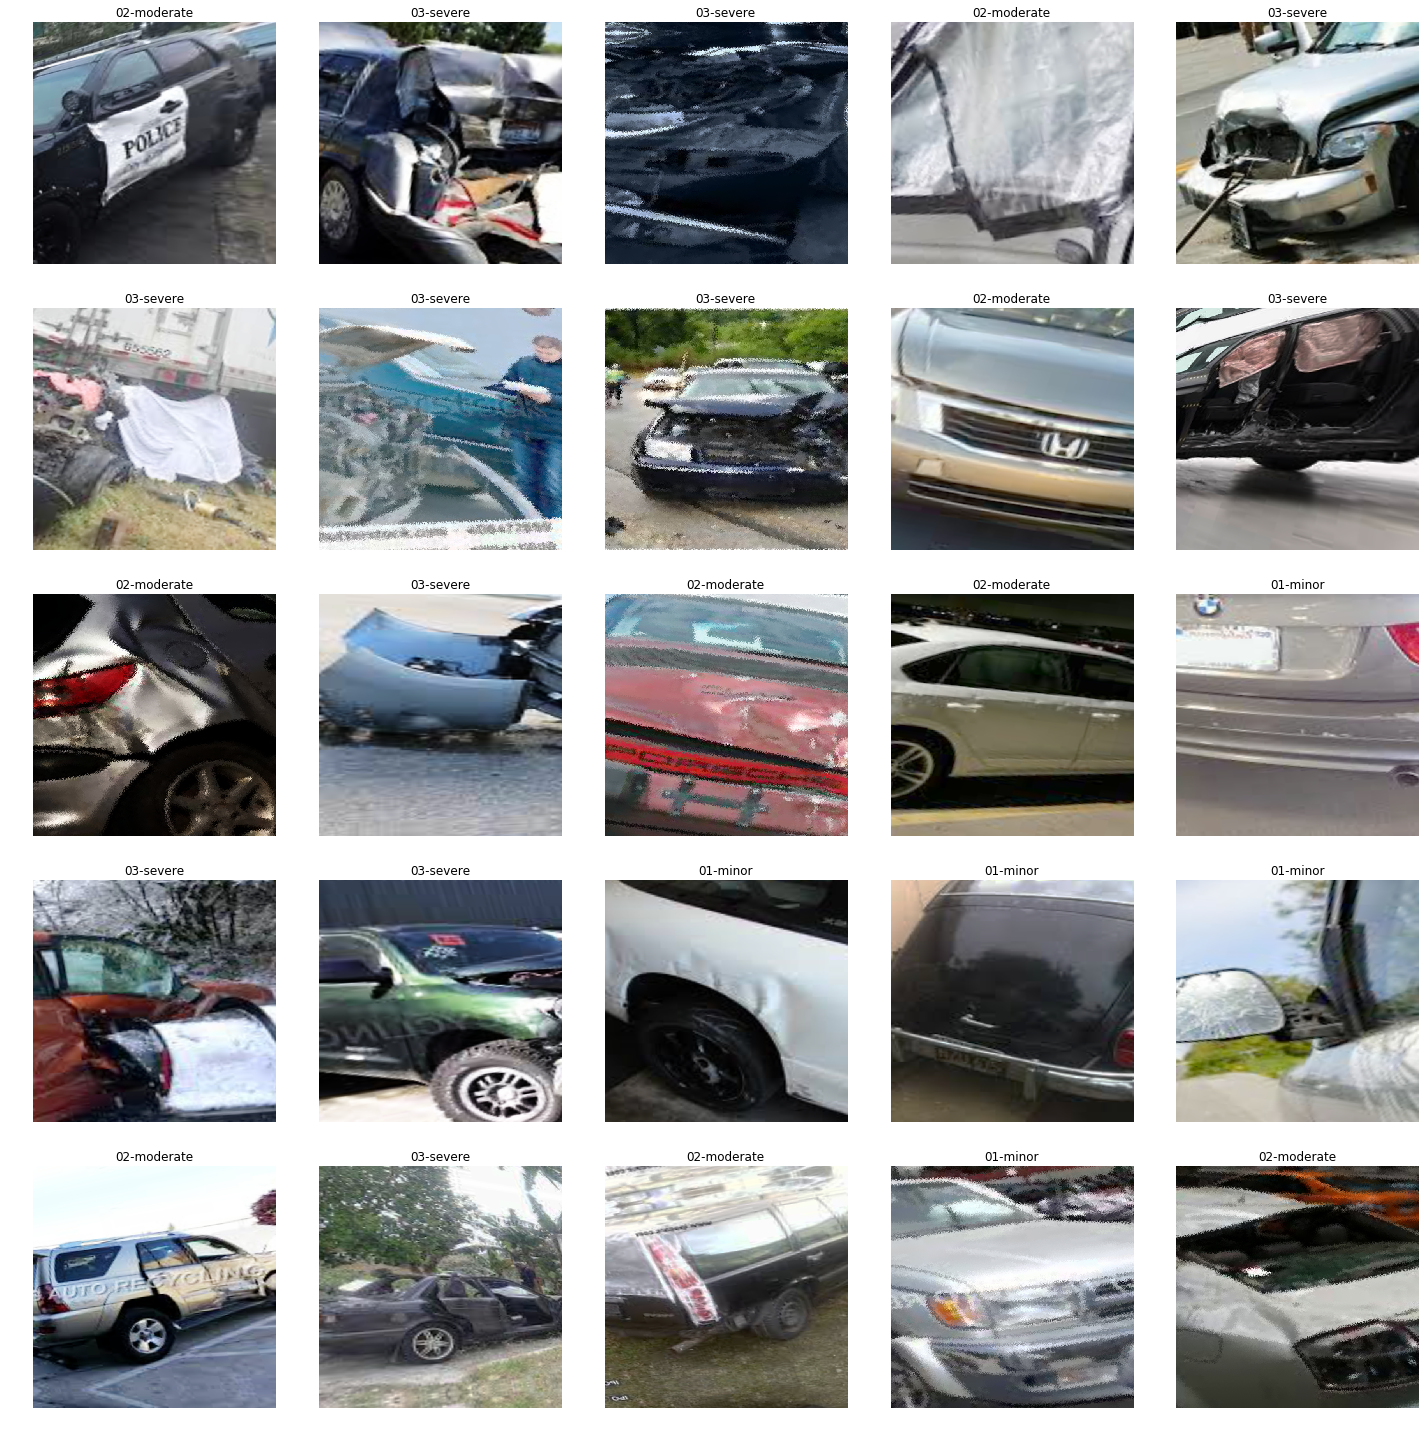

In [11]:
data1.show_batch()

In [23]:
print(len(data1.classes))
print(data1.classes)

3
['01-minor', '02-moderate', '03-severe']


In [24]:
learn1 = create_cnn(data1, models.resnet50, pretrained=True, metrics=[error_rate, accuracy])
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


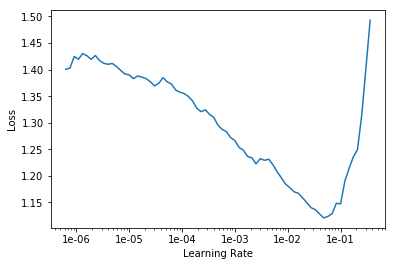

In [25]:
learn1.lr_find()
learn1.recorder.plot()

In [26]:
learn1.fit_one_cycle(10, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,1.135778,0.974507,0.456140,0.543860,00:13
2,0.996575,1.049537,0.415205,0.584795,00:14
3,0.884987,0.928254,0.362573,0.637427,00:13
4,0.786741,0.863156,0.345029,0.654971,00:14
5,0.705107,0.852464,0.339181,0.660819,00:13
6,0.618695,0.950281,0.345029,0.654971,00:13
7,0.539286,0.850473,0.339181,0.660819,00:14
8,0.470412,0.842989,0.327485,0.672515,00:13
9,0.418960,0.832633,0.362573,0.637427,00:13
10,0.380775,0.830649,0.362573,0.637427,00:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


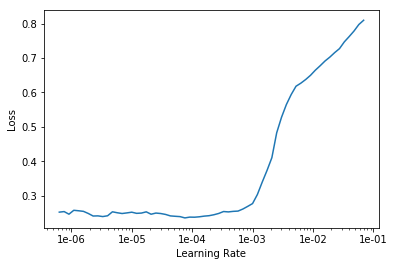

In [27]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [28]:
learn1.fit_one_cycle(10, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.245773,0.832536,0.356725,0.643275,00:17
2,0.250374,0.868608,0.345029,0.654971,00:17
3,0.240343,0.922632,0.362573,0.637427,00:16
4,0.215039,0.853762,0.339181,0.660819,00:17
5,0.201980,0.867926,0.356725,0.643275,00:17
6,0.185038,0.849376,0.333333,0.666667,00:17
7,0.167171,0.839481,0.345029,0.654971,00:16
8,0.151545,0.827266,0.333333,0.666667,00:16
9,0.142190,0.828886,0.339181,0.660819,00:17
10,0.132274,0.829793,0.339181,0.660819,00:16


In [ ]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [21]:
learn1.fit_one_cycle(10, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.806811,0.717077,0.327485,0.672515,00:17
2,0.802688,0.715610,0.327485,0.672515,00:16
3,0.809339,0.712658,0.339181,0.660819,00:17
4,0.818326,0.713401,0.333333,0.666667,00:17
5,0.805514,0.711334,0.333333,0.666667,00:17
6,0.810056,0.711652,0.339181,0.660819,00:17
7,0.807933,0.712965,0.339181,0.660819,00:17
8,0.801989,0.713563,0.345029,0.654971,00:17
9,0.806824,0.714022,0.339181,0.660819,00:17
10,0.807483,0.714637,0.339181,0.660819,00:17


In [ ]:
log_preds, y = learn1.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

In [ ]:
preds,y,losses = learn1.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn1, preds, y, losses)

In [ ]:
interp.plot_top_losses(9, figsize=(7,7))

In [ ]:
interp.plot_confusion_matrix()

In [5]:
data2 = ImageDataBunch.from_folder(path/'data3a','training','validation',ds_tfms=tfms, bs=64, size=224).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet152, pretrained=True, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


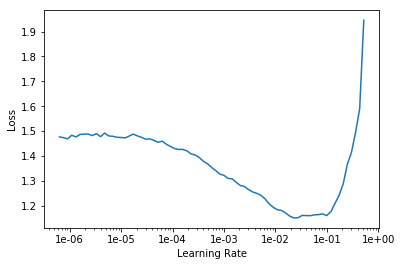

In [6]:
learn2.lr_find()
learn2.recorder.plot()

In [7]:
learn2.fit_one_cycle(10, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,1.137195,0.772533,0.333333,0.666667,00:09
2,0.948299,1.159372,0.356725,0.643275,00:08
3,0.798451,0.947732,0.350877,0.649123,00:09
4,0.702951,0.864051,0.339181,0.660819,00:09
5,0.607350,0.879121,0.350877,0.649123,00:09
6,0.514176,0.888470,0.315789,0.684211,00:09
7,0.430583,0.910988,0.280702,0.719298,00:08
8,0.373326,0.920434,0.304094,0.695906,00:09
9,0.312810,0.909732,0.315789,0.684211,00:08
10,0.275648,0.904736,0.321637,0.678363,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


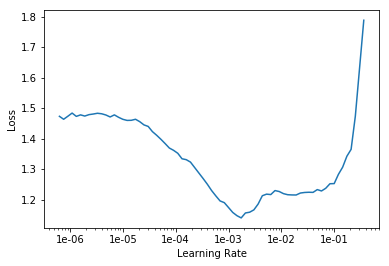

In [7]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [10]:
learn2.fit_one_cycle(10, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.159205,0.908823,0.309942,0.690058,00:11
2,0.146852,0.954576,0.298246,0.701754,00:11
3,0.137231,0.991174,0.292398,0.707602,00:11
4,0.125794,0.943819,0.298246,0.701754,00:11
5,0.115383,0.916632,0.263158,0.736842,00:11
6,0.100527,0.991867,0.286550,0.713450,00:11
7,0.085122,1.000208,0.286550,0.713450,00:11
8,0.076696,0.992548,0.292398,0.707602,00:11
9,0.068536,0.989396,0.286550,0.713450,00:11
10,0.057979,0.983231,0.309942,0.690058,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


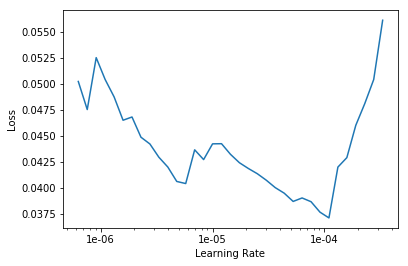

In [11]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [12]:
learn2.fit_one_cycle(10, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.048818,0.990051,0.304094,0.695906,00:11
2,0.044658,0.983689,0.292398,0.707602,00:11
3,0.048264,0.968563,0.280702,0.719298,00:11
4,0.048934,0.976053,0.280702,0.719298,00:11
5,0.045419,0.988973,0.274854,0.725146,00:11
6,0.045497,0.997127,0.274854,0.725146,00:11
7,0.042150,0.999299,0.269006,0.730994,00:11
8,0.038161,0.999251,0.269006,0.730994,00:11
9,0.040293,0.996567,0.274854,0.725146,00:11
10,0.038460,0.997965,0.274854,0.725146,00:11


In [9]:
log_preds, y = learn2.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.2749)